# 第11章 线性回归图
## 11.1 简介
在本章中将解释如何使用高尔顿 父子身高数据集，该数据集由弗朗西斯-高尔顿本人创建。高尔顿是一位 高尔顿是19世纪的科学家，他提出了回归模型的概念。 该回归模型用以探索关于父母和孩子身高之间关系的数据，在本章节中将致力于创建趋势线和诊断图。将带领你从一个基本的回归图开始，，一步一步地解释添加到代码中的所有自定义功能，还将解释如何使用 plotnine创建回归诊断图，如图 11-1所示。

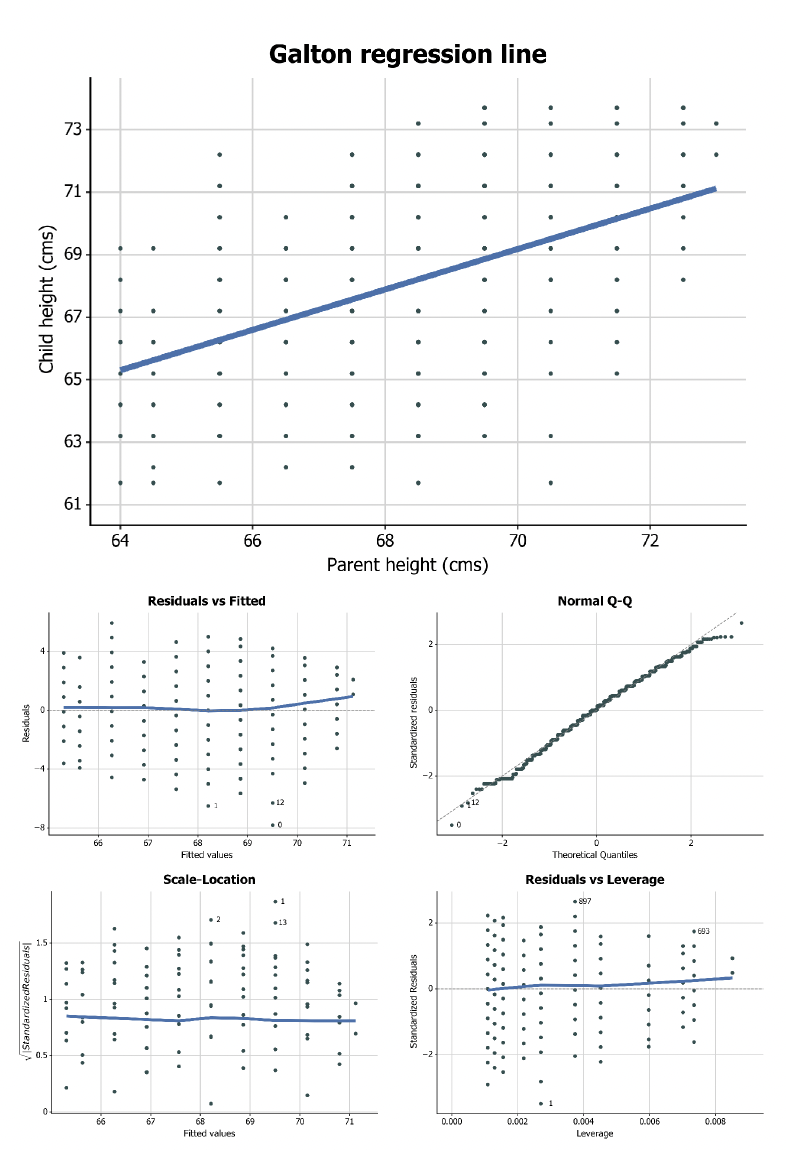

一步是导入所有需要的软件包，为此需要：
- pandas和它的DataFrame类来读入和处理数据
- plotnine来获取数据并创建图表
- numpy用于在图表中进行一些基本的数学运算
- statsmodels.api来创建回归模型并获得诊断图所需的变量
- matplotlib软件包所有的数据绘制成图表，还可以通过使用来自 plotnine中的figure_size函数来改变图的大小。在本章中调整了图的大小，使它们显示得更整齐地显示。

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
import plotnine
plotnine.options.figure_size=(7, 4.8)
from plotnine import *
from pandas import DataFrame

接下来，需要下载数据集。由于这是一个R数据集，不包括在R中的默认数据集，这里需要下载它。

In [2]:
galton = pd.read_csv(
"https://vincentarelbundock.github.io/Rdatasets/csv/HistData/Galton.csv",
header=0,
usecols=[1, 2],
)

## 11.2 ggplot的基本结构
为了初始化一个回归图，需要告诉ggplot，galton是数据。 并指定X轴绘制父变量，Y轴绘制子变量。把X和Y变量放在了 aes方法中，aes是审美映射的简称，它决定了不同变量将如何被映射到图表的哪个部分，ggplot已经将parent映射到了x轴，child映射到了 y轴。 在图中没有任何输出，如图 11-2所示。为了渲染数据，需要告诉ggplot我们想如何直观地表现它。

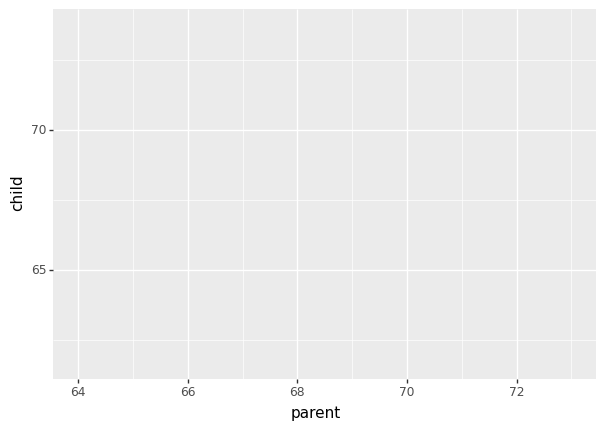

<ggplot: (141600878656)>

In [3]:
p11 = ggplot(galton, aes("parent", "child"))
p11

## 11.3 趋势线图
我们将估计一个形式为的模型，其中，是对父母和他们的孩子的身高的观察值。在画图表之前，将使用statsmodels.api的OLS方法创建回归模型。

In [4]:
X = galton["parent"]
y = galton["child"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  child   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     246.8
Date:                Sun, 24 Jul 2022   Prob (F-statistic):           1.73e-49
Time:                        16:58:55   Log-Likelihood:                -2063.6
No. Observations:                 928   AIC:                             4131.
Df Residuals:                     926   BIC:                             4141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.9415      2.811      8.517      0.000      18.425      29.458
parent         0.6463      0.041     15.711      0.000       0.566       0.727
==============================================================================
Omnibus:                       11.057   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               10.944
Skew:                          -0.241   Prob(JB):                      0.00420
Kurtosis:                       2.775   Cond. No.                     2.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

由此可以看出，回归斜率的形式应该是y1 = 23.94 + 0.65x1 + e1，也就是说，它的X截距为23.94，斜率为 0.65. 还要注意的是，调整后的R平方很低（0.21），这说明这个模型中存在相当大的误差，现在把它可视化，如图 11-3所示。可以通过在图表中添加geom_smooth(method="lm")方法来做到这一点，同时通过添加geom_point(shape="o")选项绘制原始数据，看看回归线的拟合程度。

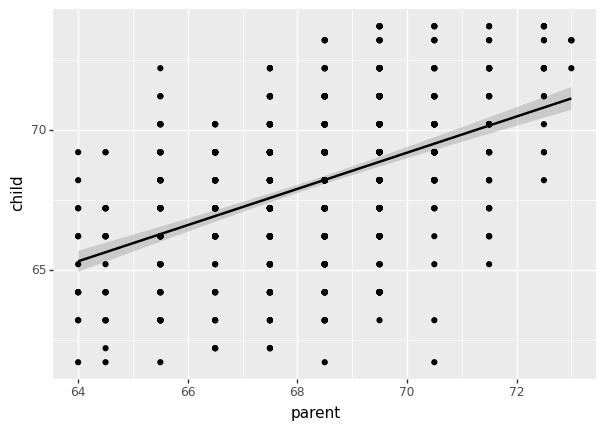

<ggplot: (141600908614)>

In [5]:
p11 = (
ggplot(galton, aes("parent", "child"))
+ geom_smooth(method="lm")
+ geom_point(shape="o")
)
p11

图表反映了模型告诉我们的情况，如图 11-4所示。父母身高每增加一厘米，孩子的身高就会增加半厘米以上。 原始数据的广泛分布表明调整后的R2相对较低，而 geom_smooth则可以定制置信区。

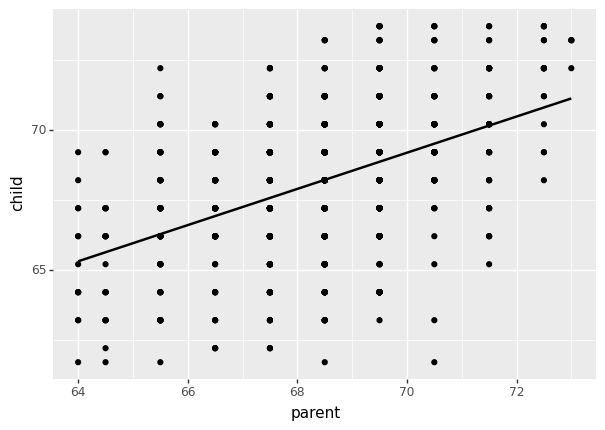

<ggplot: (141703721527)>

In [6]:
p11 = (
ggplot(galton, aes("parent", "child"))
+ geom_smooth(method="lm", se=False)
+ geom_point(shape="o")
)
p11

在继续之前，最好是固定轴的标签并添加一个标题。

## 11.4 自定义轴标签
可以使用xlab和ylab选项来改变坐标轴标签的文本，这两个方法中的名称都是以字符串形式传递的。

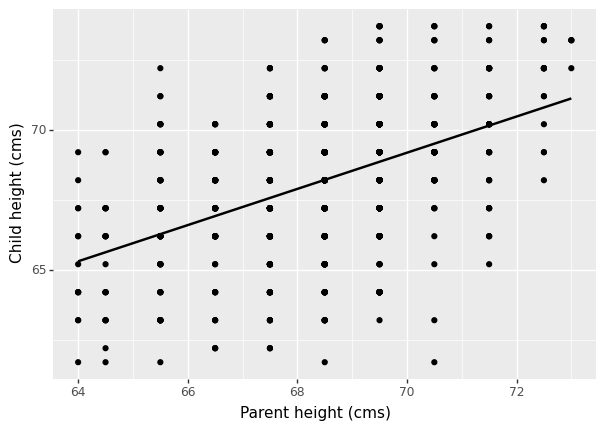

<ggplot: (141603311836)>

In [7]:
p11 = (
ggplot(galton, aes("parent", "child"))
+ geom_smooth(method="lm", se=False)
+ geom_point(shape="o")
+ xlab("Parent height (cms)")
+ ylab("Child height (cms)")
)
p11

## 11.5 添加一个标题 
同样地，可以使用lab方法来添加一个标题，如图 11-6所示。

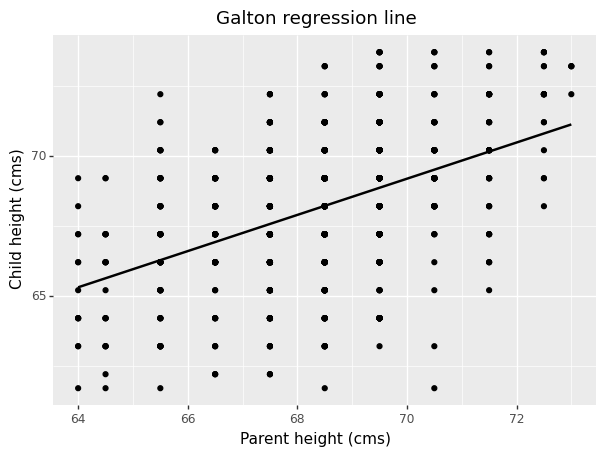

<ggplot: (141603249957)>

In [8]:
p11 = (
ggplot(galton, aes("parent", "child"))
+ geom_smooth(method="lm", se=False)
+ geom_point(shape="o")
+ xlab("Parent height (cms)")
+ ylab("Child height (cms)")
+ labs(title="Galton regression line")
)
p11

## 11.6 调整轴的刻度
可以使用scale_x_continuous改变X轴的刻度线，如图 11-7所示。 同样地，要改变Y轴，可以使用scale_y_continuous方法。这里把Y轴改为每2厘米一格，以配合X轴。可以使用break方法来改变断点，该方法需要一个数值列表作为参数。可以使用numpy的range函数来缩短手动输入整个列表的时间。可以从选择的初始值、停止值和步长值中分别生成一个序列。注意，由于 Python 的索引系统，需要 将最大值设置为大于所需的数字1。同样地，可以使用limits参数来定义轴的最小值和最大值。

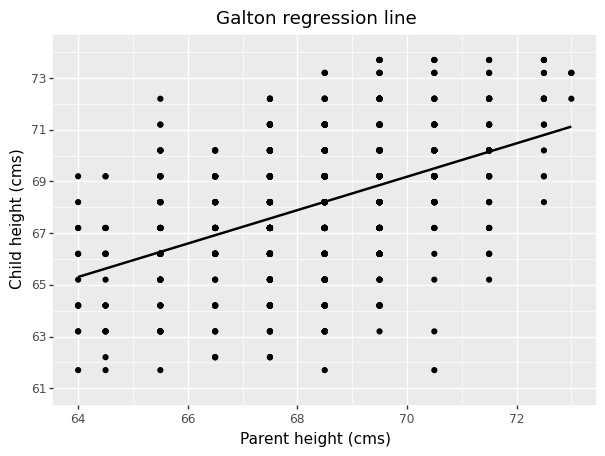

<ggplot: (141603250496)>

In [9]:
p11 = (
ggplot(galton, aes("parent", "child"))
+ geom_smooth(method="lm", se=False)
+ geom_point(shape="o")
+ xlab("Parent height (cms)")
+ ylab("Child height (cms)")
+ labs(title="Galton regression line")
+ scale_y_continuous(breaks=np.arange(61, 74, 2),
limits=[61, 74])
)
p11

## 11.7 使用白色主题
正如前几章所解释的，也可以通过主题来改变图表的整体外观，通过添加 theme_bw()方法开始使用一个简单的主题定制，如图 11-8所示。

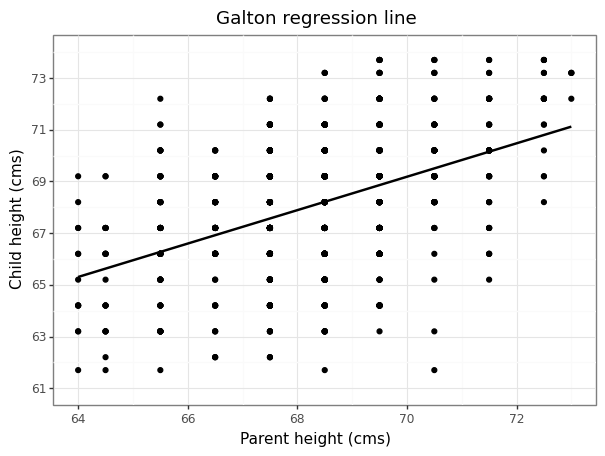

<ggplot: (141603365175)>

In [10]:
p11 = (
ggplot(galton, aes("parent", "child"))
+ geom_smooth(method="lm", se=False)
+ geom_point(shape="o")
+ xlab("Parent height (cms)")
+ ylab("Child height (cms)")
+ labs(title="Galton regression line")
+ scale_y_continuous(breaks=np.arange(61, 74, 2),
limits=[61, 74])
+ theme_bw()
)
p11

## 11.8 创建一个XKCD风格的图表
当然，也能想创建自己的主题。 自己的主题具有非常高的定制化程度，包括允许使用导入字体。 plotnine 已经有一个 theme_xkcd() 实现，但这里还是从头开始创建了一个， 这里会解释如何使用导入的字体和一些主题中的其他选项来调整图表的整体外观。首先需要下载XKCD字体。一旦有了字体，就可以使用matplotlib.font_manager类把它加载到到Python中。

In [11]:
import matplotlib.font_manager as fm
fpath = "xkcd-Regular.otf"

由于这是一种导入的字体，不能在图形中直接改变其大小。 相反，需要改变导入的字体对象来改变其大小。由于希望标题和正文有不同的字体大小，将创建两个不同的字体对象，title_text和body_set。 然后，可以在这些对象上调用方法把字号改为18号，并使用 set_size()和set_weight方法将其改为粗体。同样地，我们将把正文的字号改为 12号。

In [12]:
# Create font objects
title_text = fm.FontProperties(fname=fpath)
body_text = fm.FontProperties(fname=fpath)
# Alter size and weight of font objects
title_text.set_size(18)
title_text.set_weight("bold")
body_text.set_size(12)

为了使图表看起来更像XKCD的艺术风格，将做一些更多的调整，如图 11-9所示
- 改变 axis_line_x 和 axis_line_y 的值可以改变轴线的粗细
- 将 legend_key 的参数设置为 element_blank()，可以去除图例周围的方框
- 去除网格线，需要改变四个参数的值： panel_grid_major, panel_grid_minor, panel_border 和 panel_background。
- 使用刚刚导入的XKCD字体，需要改变plot_title和text的值。
- 将文本的颜色改为黑色（从其默认的灰色）要改变 axis_text_x 和 axis_text_y 的值。

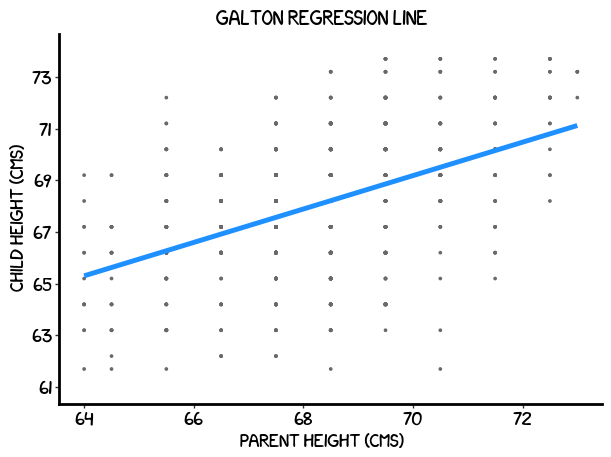

<ggplot: (141603245764)>

In [13]:
p11 = (
ggplot(galton, aes("parent", "child"))
+ geom_point(shape=".", colour="dimgrey")
+ geom_smooth(method="lm", se=False, colour="dodgerblue",
size=2)
+ xlab("Parent height (cms)")
+ ylab("Child height (cms)")
+ labs(title="Galton regression line")
+ scale_y_continuous(breaks=np.arange(61, 74, 2),
limits=[61, 74])
+ theme(
axis_line_x=element_line(size=2, colour="black"),
axis_line_y=element_line(size=2, colour="black"),
panel_grid_major=element_blank(),
panel_grid_minor=element_blank(),
panel_border=element_blank(),
panel_background=element_blank(),
plot_title=element_text(fontproperties=title_text),
text=element_text(fontproperties=body_text),
axis_text_x=element_text(colour="black"),
axis_text_y=element_text(colour="black"),
)
)
p11

## 11.9 使用 "538 "主题
ggplot软件包有更多的预建主题可供选择，下面应用了theme_538()，如图 11-10所示。 它接近于FiveThirtyEight网站上的图形。这里在axis_title、plot_title和text中使用了商业上可用的字体 "Atlas Grotesk "和 "Decima Mono Pro'。这只是为了使这些图表 与网站上的一模一样，而且完全是可选的。

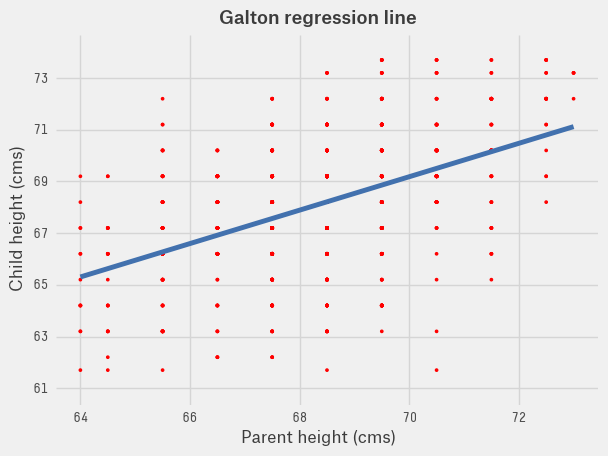

<ggplot: (141603525087)>

In [14]:
agm = "AtlasGrotesk-Medium.otf"
agr = "AtlasGrotesk-Regular.otf"
dp = "DecimaMonoPro.otf"
# Create font objects
title_text = fm.FontProperties(fname=agm)
axis_text = fm.FontProperties(fname=agr)
body_text = fm.FontProperties(fname=dp)
# Alter size and weight of font objects
title_text.set_size(16)
axis_text.set_size(12)
body_text.set_size(10)
p11 = (
ggplot(galton, aes("parent", "child"))
+ geom_point(shape=".", colour="red")
+ geom_smooth(method="lm", se=False, colour="#4271AE",
size=2)
+ xlab("Parent height (cms)")
+ ylab("Child height (cms)")
+ labs(title="Galton regression line")
+ scale_y_continuous(breaks=np.arange(61, 74, 2),
limits=[61, 74])
+ theme_538()
+ theme(
axis_title=element_text(fontproperties=axis_text),
plot_title=element_text(fontproperties=title_text),
text=element_text(fontproperties=body_text),
)
)
p11


## 11.10 创建自己的主题
现在，已经探索了图表定制中的一些可用选项。 现在可以建立自己的完全定制的图表，如图 11-11所示。
- 改变 axis_line 的大小和颜色参数，可以使线条变粗并将其颜色改为黑色
- 改变传递给panel_grid_major的颜色参数意味着所有的主要网格线现在是浅灰色的。
- 通过改变 panel_grid_major 的参数来去除次要网格线和背景，通过改变 panel_grid_minor、panel_border 和 panel_background 的参数来去除次要网格线和背景
- 使用字体Tahoma

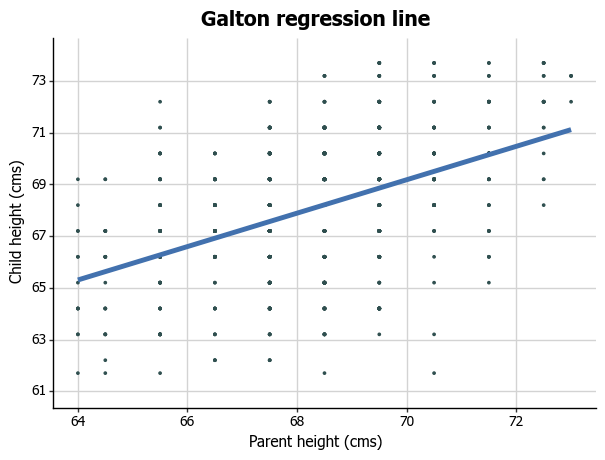

<ggplot: (141600897609)>

In [15]:
p11 = (
ggplot(galton, aes("parent", "child"))
+ geom_point(shape=".", colour="darkslategrey")
+ geom_smooth(method="lm", se=False, colour="#4271AE",
size=2)
+ xlab("Parent height (cms)")
    + ylab("Child height (cms)")
+ labs(title="Galton regression line")
+ scale_y_continuous(breaks=np.arange(61, 74, 2),
limits=[61, 74])
+ theme(
axis_line=element_line(size=1, colour="black"),
panel_grid_major=element_line(colour="#d3d3d3"),
panel_grid_minor=element_blank(),
panel_border=element_blank(),
panel_background=element_blank(),
plot_title=element_text(size=15, family="Tahoma",
face="bold"),
text=element_text(family="Tahoma", size=11),
axis_text_x=element_text(colour="black", size=10),
axis_text_y=element_text(colour="black", size=10),
)
)
p11

## 11.11 回归诊断图
创建回归模型的一个重要部分是评估它们的适合程度 。在R语言中，一系列的诊断图可以通过使用诸如 ggfortify来创建。然而，由于 plotnine 还没有相应的函数，需要手动创建这些图。在本章的开头创建了一个线性回归模型对象 叫做 model。可以从这个对象中获得需要的值，以创建我们所有的图。这里将提取：
- 模型拟合值（model_fitted_y），残差（model_residuals） 和绝对残差（model_abs_resid），用于绘制残差与拟合值的对比。
- 规范的残差（model_norm_residuals），用于创建quantilequantile 图。
- 规范化残差的绝对平方根（model_norm_residuals_- abs_sqrt）加上拟合值，用于创建标度-位置图
- 杠杆率（model_leverage）、库克距离（model_cooks）加上规范化的 残差来创建杠杆率与残差图。 为了使 plotnine 更容易使用这些数据，将这些数据合并为 一个DataFrame。


In [16]:
model_fitted_y = model.fittedvalues
model_residuals = model.resid
model_norm_residuals = model.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
model_abs_resid = np.abs(model_residuals)
model_leverage = model.get_influence().hat_matrix_diag
model_cooks = model.get_influence().cooks_distance[0]
diags = pd.concat(
[
model_fitted_y,
model_residuals,
pd.Series(model_norm_residuals),
pd.Series(model_norm_residuals_abs_sqrt),
model_abs_resid,
pd.Series(model_leverage),
pd.Series(model_cooks),
],
axis=1,
)
diags.columns = [
"fitted_y",
"residuals",
"normed_residuals",
"abs_sqrt_normed_residuals",
"abs_residuals",
"leverage",
"cooks",
]

还需要计算理论上的量值，以便绘制量化量化曲线图。为了做到这一点，首先使用statsmodels.api的model_norm_residuals制作一个ProbPlot对象，可以提取理论上的量值并将其添加到 DataFrame中

In [17]:
def make_qq(dd, x):
    
    QQ = sm.ProbPlot(model_norm_residuals)
    dd = dd.sort_values(x)
    dd["qq"] = QQ.theoretical_quantiles
    return dd
diags = make_qq(diags, "normed_residuals")

## 11.11 残差与拟合图
要创建的第一个图是残差与拟合图。需要做的第一件事是找到这个图表的前三个离群点：即绝对残差。

In [18]:
outliers_1 = diags["abs_residuals"].isin(sorted(model_abs_resid,reverse=True)[:3])

被用来在图表上标注这些点的索引，就像在R回归诊断图中看到的那样。 看看这些点代表了数据的哪个部分

In [19]:
diags.loc[outliers_1, ["abs_residuals", "fitted_y", "residuals"]]

,abs_residuals,fitted_y,residuals
0,7.805016,69.505016,-7.805016
1,6.512435,68.212435,-6.512435
12,6.305016,69.505016,-6.305016


现在可以创建绘图，把拟合值（ fitted_y） 变量放在X轴上，残差（residuals）放在Y轴上。然后把点（geom_point()）和lowess线放入（stat_smooth(method="lowess") 图中。在y=0处添加参考线（geom_hline(yintercept=0)），将前3个离群值添加到geom_text(ais(label=np.where(outliers_1, outliers_1.index, ""))中去，当outliers_1等于True时，该点的索引将被显示出来，否则就不会有任何显示。 最后，通过改变x轴和y轴的标题来完成绘图并调整X轴刻度线的比例，如图 11-12所示。

C:\Users\xu\AppData\Roaming\Python\Python39\site-packages\plotnine\stats\smoothers.py:309: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


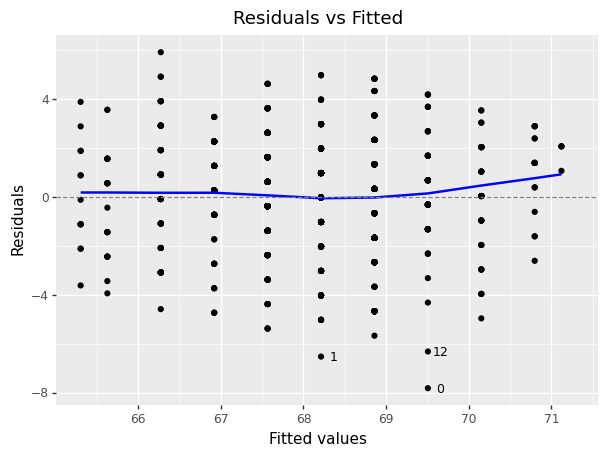

<ggplot: (141603295537)>

In [20]:
r1 = (
ggplot(diags, aes("fitted_y", "residuals"))
+ geom_point()
+ stat_smooth(method="lowess", colour="blue")
+ geom_hline(yintercept=0, size=0.5, colour="grey",
linetype="dashed")
+ geom_text(
aes(label=np.where(outliers_1, outliers_1.index, "")),
size=9, nudge_x=0.15
)+
xlab("Fitted values")
+ ylab("Residuals")
+ labs(title="Residuals vs Fitted")
+ scale_x_continuous(breaks=np.arange(66, 72, 1))
)
r1

现在有了一个非常接近于由R语言中的ggfortify制作的残差与拟合图的结果。 如果将这些图表与R创建的图表进行比较，会注意到异常值的标签相差1。 Python的索引是从0开始的，而不是1，所以可以简单地在索引标签上加1，像这样：outliers_1.index + 1。
## 11.12 正常Q-Q图
接下来，我们创建出Q-Q图。再次，我们找到前3个离群点：这次是为 规范化残差，并将它们保存到outliers_2。 接下来，我们创建一个理论量值（qq）与规范化残差（normed_resolution）的GG图。 残差（normed_residuals）。我们将数据添加为点（geom_point），并使用geom_ab创建 使用geom_abline(intercept=0, slope=1)创建参考线。再次，我们使用geom_text添加 使用geom_text()添加离群值，最后，调整标题。

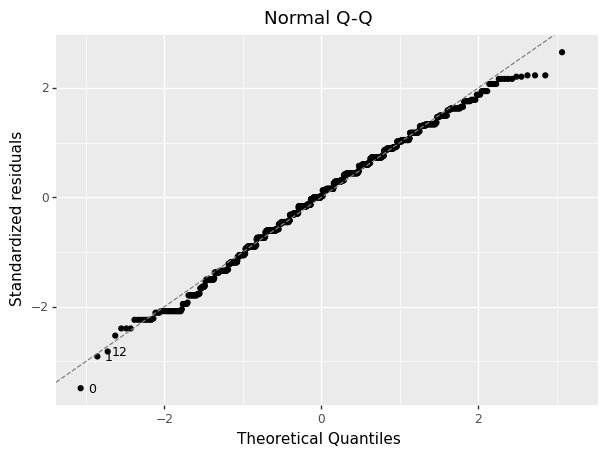

<ggplot: (141603339659)>

In [21]:
outliers_2 = abs(diags["normed_residuals"]).isin(
sorted(np.abs(model_norm_residuals), reverse=True)[:3]
)
r2 = (
ggplot(diags, aes("qq", "normed_residuals"))
+ geom_point()
+ geom_abline(intercept=0, slope=1, size=0.5,
colour="grey", linetype="dashed")
+ geom_text(
aes(label=np.where(outliers_2, outliers_2.index, "")),
size=9, nudge_x=0.15
)+
xlab("Theoretical Quantiles")
+ ylab("Standardized residuals")
+ labs(title="Normal Q-Q")
)
r2

## 11.13 比例-位置图
比例-位置图也采用了类似的过程。只需将拟合的拟合值（ fitted_y）与规范化残差的绝对平方根（abs_sqrt_normed_residuals）。 (abs_sqrt_normed_residuals)，添加点和一条lowess线，以abs_sqrt_normed_residuals的形式标注前三个离群值，并调整标题和X轴的刻度线即可，如图 11-13所示。

C:\Users\xu\AppData\Roaming\Python\Python39\site-packages\plotnine\stats\smoothers.py:309: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


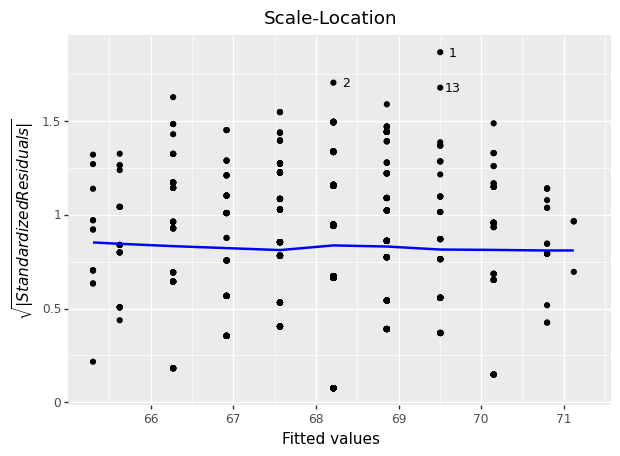

<ggplot: (141605795756)>

In [22]:
outliers_3 = diags["abs_sqrt_normed_residuals"].isin(
sorted(model_norm_residuals_abs_sqrt, reverse=True)[:3]
)
r3 = (
ggplot(diags, aes("fitted_y", "abs_sqrt_normed_residuals"))
+ geom_point()
+ stat_smooth(method="lowess", colour="blue")
+ geom_text(
aes(label=np.where(outliers_3, outliers_3.index + 1, "")),
size=9, nudge_x=0.15
)+
xlab("Fitted values")
+ ylab("$\sqrt{|Standardized Residuals|}$")
+ labs(title="Scale-Location")
+ scale_x_continuous(breaks=np.arange(66, 72, 1))
)
r3

## 11.14 残差与杠杆图
最后，对残差与杠杆图采取与规模-位置图相同的方法，然而，这一次，把离群值计算为那些库克距离最高的值，而不是图上存在的东西。 还手动输入了x轴的标签，作为标签参数下的一个列表中的标签参数，以确保所有的数字都显示到小数点后3位，如图 11-14所示。

C:\Users\xu\AppData\Roaming\Python\Python39\site-packages\plotnine\stats\smoothers.py:309: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


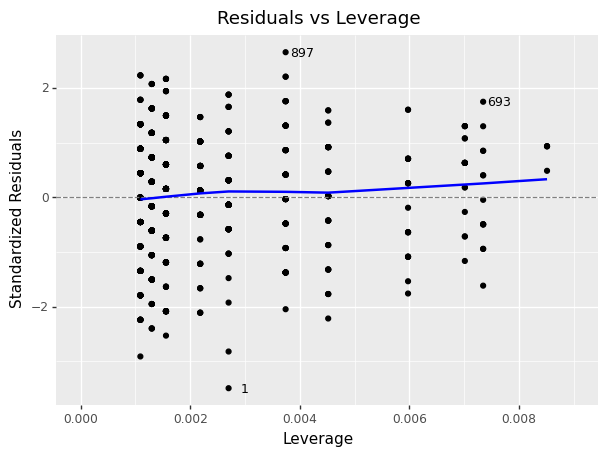

<ggplot: (141606205983)>

In [23]:
outliers_4 = diags["cooks"].isin(sorted(model_cooks, reverse=True)[:3])
r4 = (
ggplot(diags, aes("leverage", "normed_residuals"))
+ geom_point()
+ geom_hline(yintercept=0, size=0.5, colour="grey",
linetype="dashed")
+ stat_smooth(method="lowess", colour="blue")
+ geom_text(
aes(label=np.where(outliers_4, outliers_4.index + 1, "")),
size=9,
nudge_x=0.0003,
)+
xlab("Leverage")
+ ylab("Standardized Residuals")
+ labs(title="Residuals vs Leverage")
+ scale_x_continuous(
breaks=np.arange(0.000, 0.009, 0.002),
limits=[0.000, 0.009],
labels=["0.000", "0.002", "0.004", "0.006", "0.008"],
)
)
r4

## 11.15 自定义残差图
自定义函数也可以添加到所有的诊断图，如图 11-15所示和如图 11-16所示。 plotnine 实现的回归图图的实现非常灵活。这里会使用为回归图设计的自定义主题，重现在上面创建的每个诊断图。 主题再现我们为回归图设计的每个诊断图。当然，可以将这些图的外观改为我们在本章中讨论过的任何主题。

C:\Users\xu\AppData\Roaming\Python\Python39\site-packages\plotnine\stats\smoothers.py:309: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


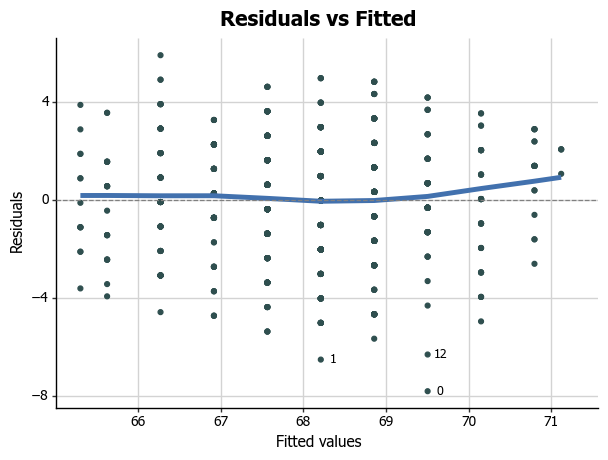

<ggplot: (141603129438)>

In [24]:
outliers_1 = diags["abs_residuals"].isin(sorted(model_abs_resid,reverse=True)[:3])
r1 = (
ggplot(diags, aes("fitted_y", "residuals"))
+ geom_point(colour="darkslategrey")
+ stat_smooth(method="lowess", colour="#4271AE", size=2)
+ geom_hline(yintercept=0, size=0.5, colour="grey",
linetype="dashed")
+ geom_text(
    aes(label=np.where(outliers_1, outliers_1.index, "")),
size=9, nudge_x=0.15
)+
xlab("Fitted values")
+ ylab("Residuals")
+ labs(title="Residuals vs Fitted")
+ scale_x_continuous(breaks=np.arange(66, 72, 1))
+ theme(
axis_line=element_line(size=1, colour="black"),
panel_grid_major=element_line(colour="#d3d3d3"),
panel_grid_minor=element_blank(),
panel_border=element_blank(),
panel_background=element_blank(),
plot_title=element_text(size=15, family="Tahoma",
face="bold"),
text=element_text(family="Tahoma", size=11),
axis_text_x=element_text(colour="black", size=10),
axis_text_y=element_text(colour="black", size=10),
)
)
r1

C:\Users\xu\AppData\Roaming\Python\Python39\site-packages\plotnine\stats\smoothers.py:309: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


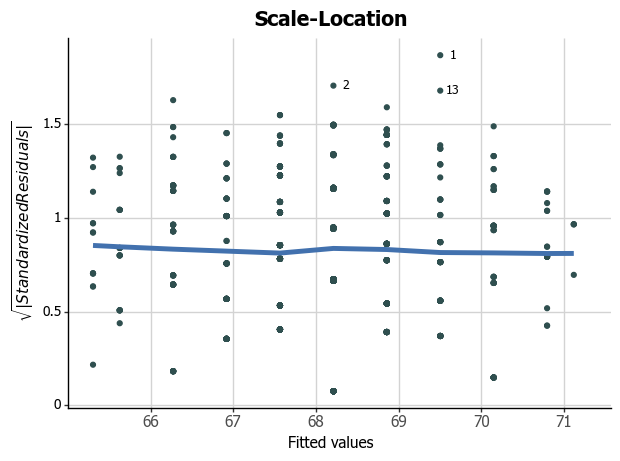

<ggplot: (141603627861)>

In [25]:
outliers_3 = diags["abs_sqrt_normed_residuals"].isin(
sorted(model_norm_residuals_abs_sqrt, reverse=True)[:3]
)
r3 = (
ggplot(diags, aes("fitted_y", "abs_sqrt_normed_residuals"))
+ geom_point(colour="darkslategrey")
+ stat_smooth(method="lowess", colour="#4271AE", size=2)
+ geom_text(
aes(label=np.where(outliers_3, outliers_3.index + 1, "")),
size=9, nudge_x=0.15
)+
xlab("Fitted values")
+ ylab("$\sqrt{|Standardized Residuals|}$")
+ labs(title="Scale-Location")
+ scale_x_continuous(breaks=np.arange(66, 72, 1))
+ theme(
axis_line=element_line(size=1, colour="black"),
panel_grid_major=element_line(colour="#d3d3d3"),
panel_grid_minor=element_blank(),
panel_border=element_blank(),
panel_background=element_blank(),
plot_title=element_text(size=15, family="Tahoma",
face="bold"),
text=element_text(family="Tahoma", size=11),
    axis_text_y=element_text(colour="black", size=10),
)
)
r3

C:\Users\xu\AppData\Roaming\Python\Python39\site-packages\plotnine\stats\smoothers.py:309: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


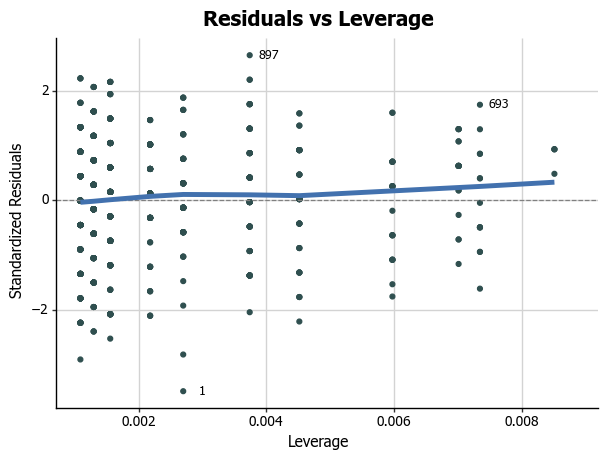

<ggplot: (141604104391)>

In [26]:
outliers_4 = diags["cooks"].isin(sorted(model_cooks, reverse=True)[:3])
r4 = (
ggplot(diags, aes("leverage", "normed_residuals"))
+ geom_point(colour="darkslategrey")
+ geom_hline(yintercept=0, size=0.5, colour="grey",
linetype="dashed")
+ stat_smooth(method="lowess", colour="#4271AE", size=2)
+ geom_text(
aes(label=np.where(outliers_4, outliers_4.index + 1, "")),
size=9,
nudge_x=0.0003,
)+
xlab("Leverage")
+ ylab("Standardized Residuals")
+ labs(title="Residuals vs Leverage")
+ scale_x_continuous(
breaks=np.arange(0.000, 0.009, 0.002),
    labels=["0.000", "0.002", "0.004", "0.006", "0.008"],
)+
theme(
axis_line=element_line(size=1, colour="black"),
panel_grid_major=element_line(colour="#d3d3d3"),
panel_grid_minor=element_blank(),
panel_border=element_blank(),
panel_background=element_blank(),
plot_title=element_text(size=15, family="Tahoma",
face="bold"),
text=element_text(family="Tahoma", size=11),
axis_text_x=element_text(colour="black", size=10),
axis_text_y=element_text(colour="black", size=10),
)
)
r4

## 11.16 将这些图合并成一个图
为了完全重现R所输出的图表，需要将诊断图结合成一个单一的图表。不幸的是，由于合并图表的实现有点笨拙，而 plotnine 的创作者还没有创造出方便的方法。 一个变通方法是将图表保存为图像，然后用一个叫gridspec的matplotlib包来组合它们。 首先要做的是将所有的图保存为png文件。将把它们保存在一个 400DPI的分辨率图像文件。 再在图表中放置这些图像

In [27]:
p11.save("main_plot.png", dpi=400)
r1.save(filename="diag1.png", dpi=400)
r2.save(filename="diag2.png", dpi=400)
r3.save(filename="diag3.png", dpi=400)
r4.save(filename="diag4.png", dpi=400)

C:\Users\xu\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 7 x 4.8 in image.
C:\Users\xu\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: main_plot.png
C:\Users\xu\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 7 x 4.8 in image.
C:\Users\xu\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: diag1.png
C:\Users\xu\AppData\Roaming\Python\Python39\site-packages\plotnine\stats\smoothers.py:309: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\xu\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 7 x 4.8 in image.
C:\Users\xu\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: diag2.png
C:\Users\xu\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:718: PlotnineW

现在需要把每个图表放在组合图上。 为了做到这一点，为每个单独的图表创建新的坐标轴子图对象，并且读入并显示图表图像，然后去除所有的轴属性（轴线、刻度线和标签。 由于将对每个图表重复同样的事情，首先创建一个函数 来做所有这些事情。函数需要2个参数：图表的位置和图表的名称。

In [28]:
def placeSubplots(position, file):
    ax_i = plt.subplot(position)
    ax_i.imshow(mpimg.imread(file), aspect="equal")
    return plt.axis("off")

然后创建一个尺寸为5.75 x 8.5英寸的matplotlib图，分辨率为 400DPI。我们还在该图上叠加了一个GridSpec，其中有8个 点，供定位图表（4×2）。最后，使用gs1.update(wspace=0.01. hspace=0.01)来减少所有图表之间的空间，以提供一个良好的紧密定位hspace=0.01）。 现在可以调用placeSubplots函数将所有图片添加到该 图，其位置参数的工作方式类似于坐标系。所以对于顶部的图表，希望它从(0,0)开始， 结束于(2,2)；因此，将该参数设置为[0:2, 0:2]。对于其他的，隐含地 说明只想让它们占据网格上的一个单元格，所以通过将第二个子图的参数设置为（例如）[2，0]表示我们 希望它从（2,0）开始，在（3,1）结束。 通过这最后一步组合图表，现在有了自定义版本的 的回归图和诊断图，如图 11-17所示。

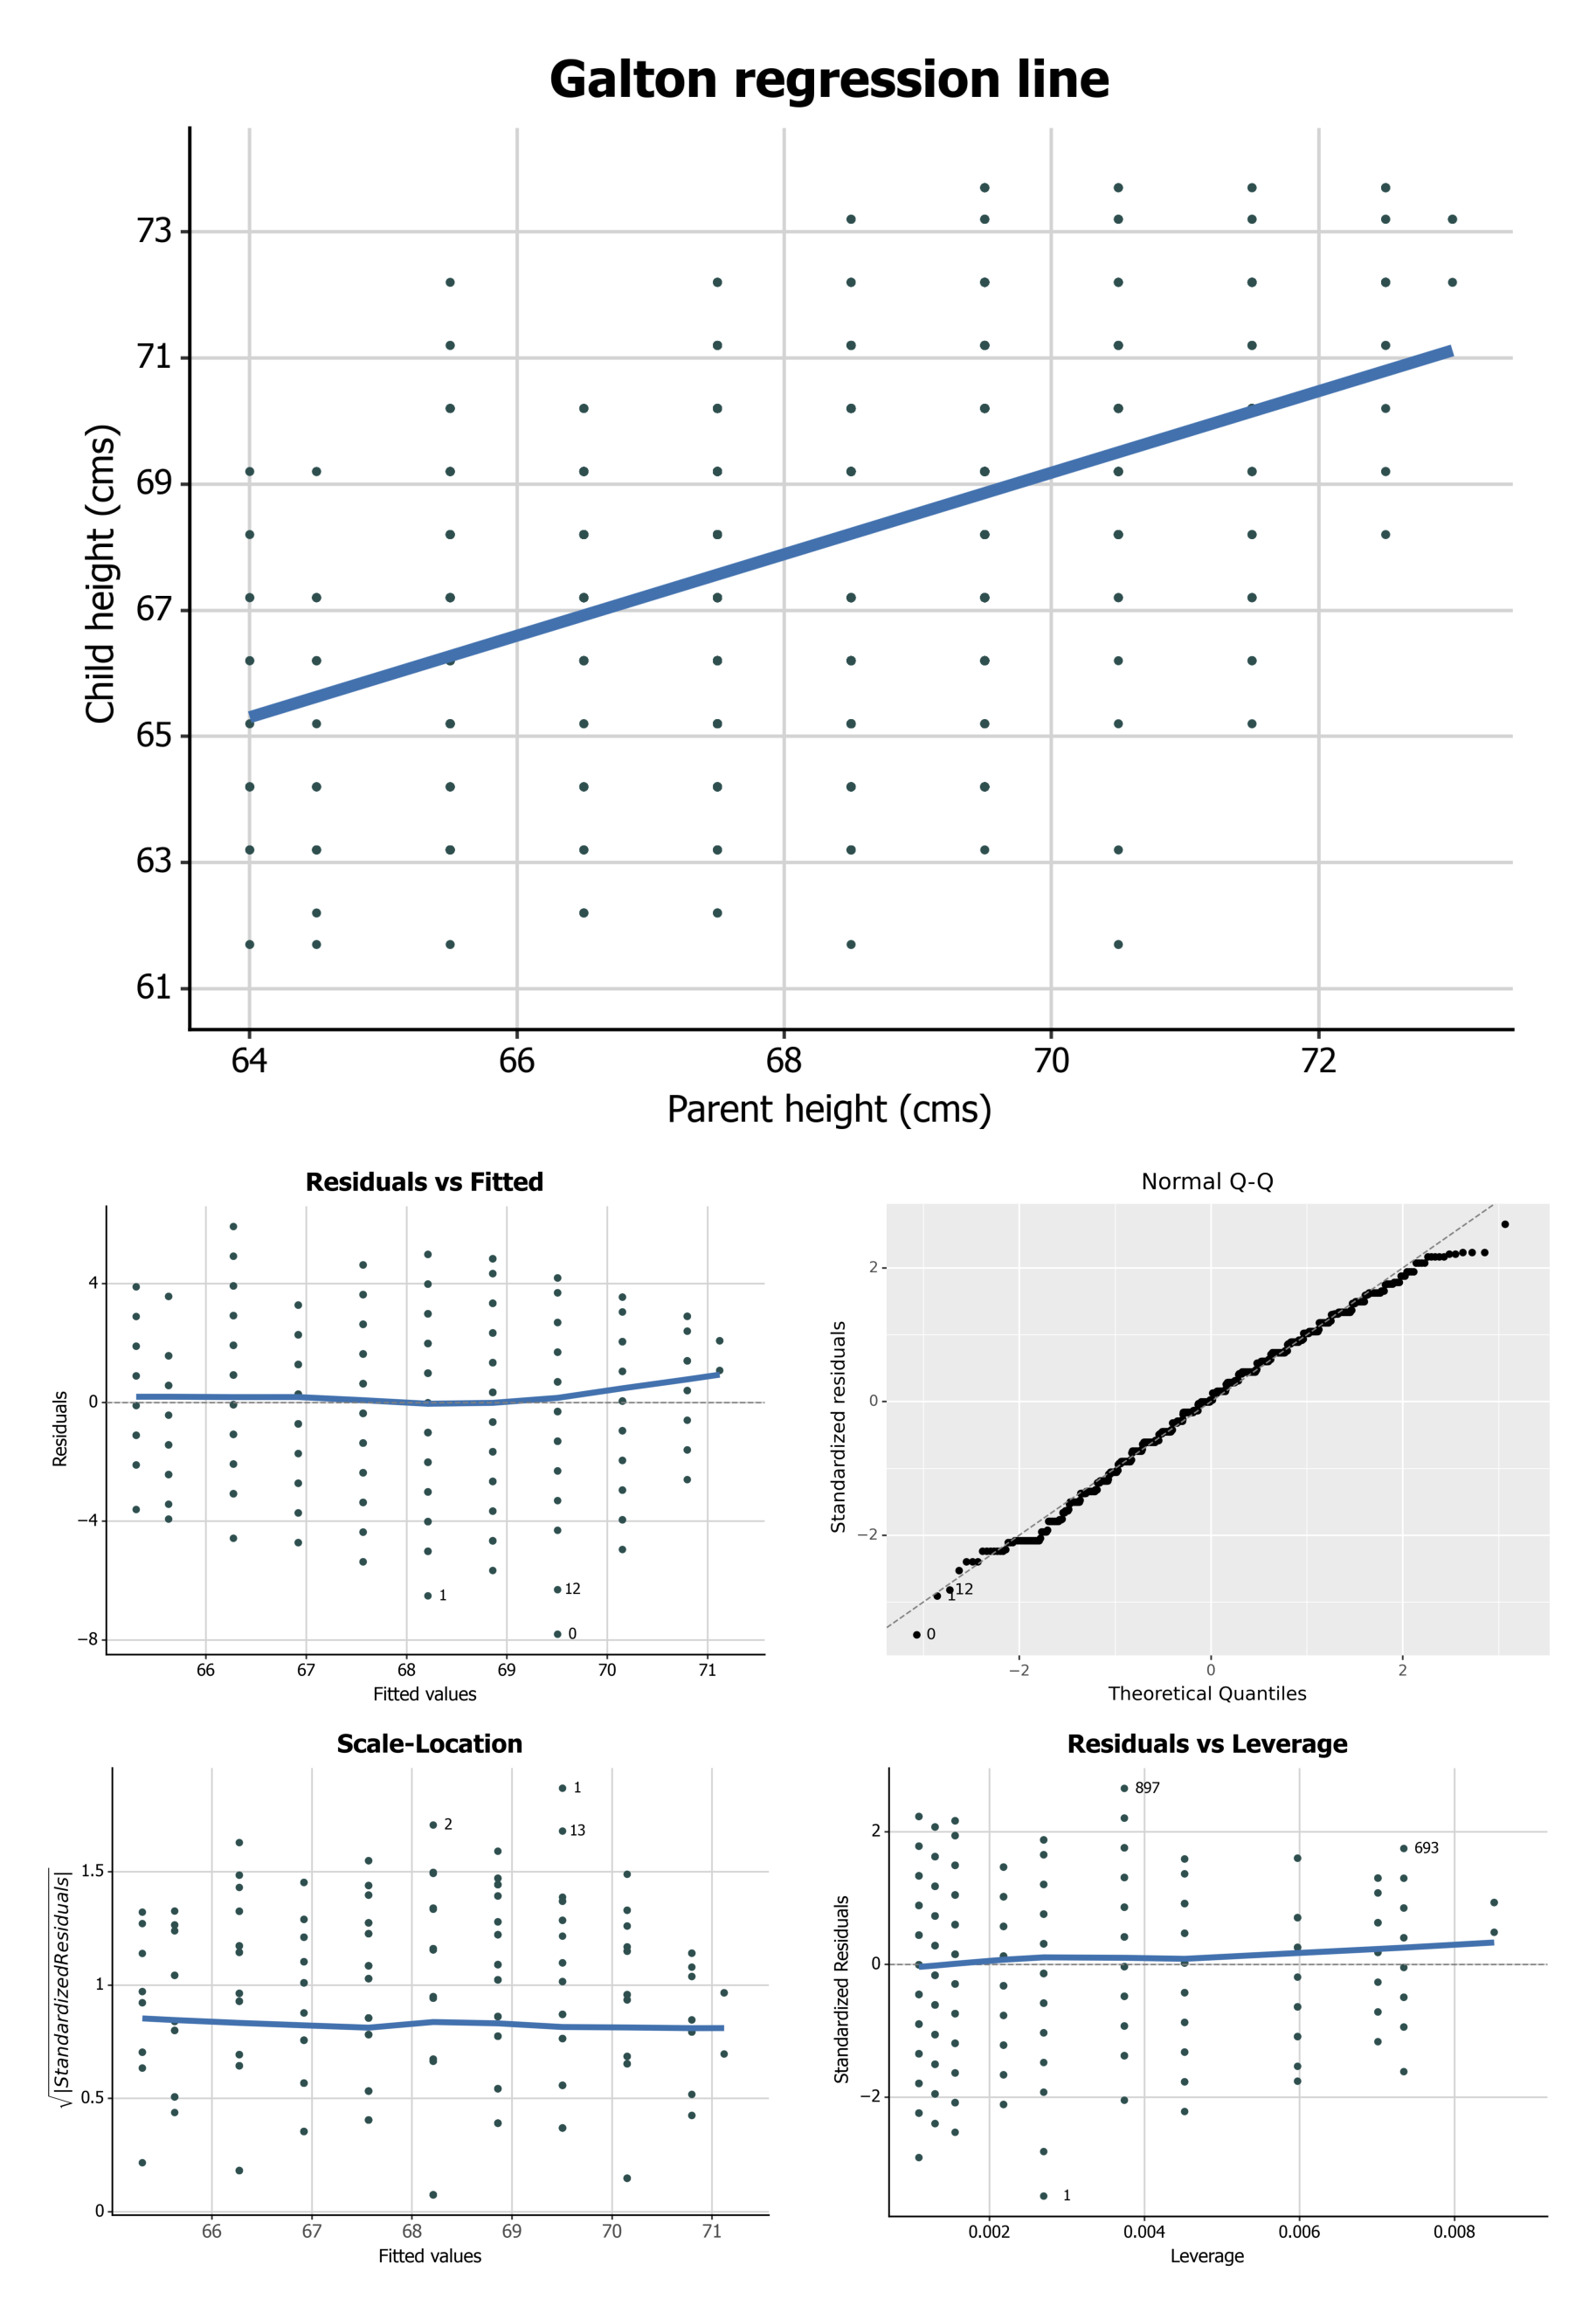

In [29]:
fig = plt.figure(figsize=(5.75, 8.5), dpi=400)
gs1 = gridspec.GridSpec(4, 2)
gs1.update(wspace=0.01, hspace=0.01)
placeSubplots(gs1[0:2, 0:2], "main_plot.png")
placeSubplots(gs1[2, 0], "diag1.png")
placeSubplots(gs1[2, 1], "diag2.png")
placeSubplots(gs1[3, 0], "diag3.png")
placeSubplots(gs1[3, 1], "diag4.png")
plt.show()